# Feature Expansion 
## Polynomials and Interactions

---

In [96]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

plt.rcParams['figure.figsize'] = (10,6)

#### Let's look again at the Anscombe dataset

In [97]:
df = sns.load_dataset('anscombe')

In [98]:
df

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


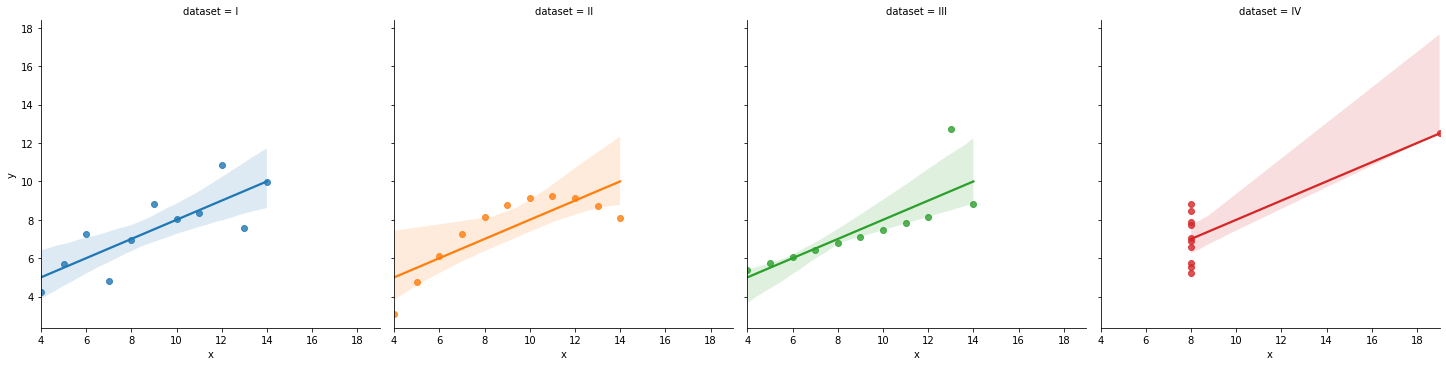

In [99]:
sns.lmplot(data = df, x = 'x', y = 'y', col = 'dataset', hue = 'dataset')

In [102]:
df.groupby('dataset').mean()

,x,y
dataset,,
I,9.0,7.500909
II,9.0,7.500909
III,9.0,7.500000
IV,9.0,7.500909


#### Questions to reflect on the fitted models: 
- **Q1**: Check out the means of the different datasets
            They are all the same
- **Q2**: What does it mean to say "they are the same linear models"?
            They have the same slope and intercept ake the same parameters
- **Q3** Are the models equally good to fit the data?
            Nooo, doesn't seem so. The error terms seem to be different.
- **Q4** Are there obvious ways to fix the models?

#### ...and try to fix the model of second data set

In [103]:
df2 = df.loc[df['dataset']=='II',['x','y']]
df2

,x,y
11,10.0,9.14
12,8.0,8.14
13,13.0,8.74
14,9.0,8.77
15,11.0,9.26
16,14.0,8.10
17,6.0,6.13
18,4.0,3.10
19,12.0,9.13
20,7.0,7.26


<AxesSubplot:xlabel='x', ylabel='y'>

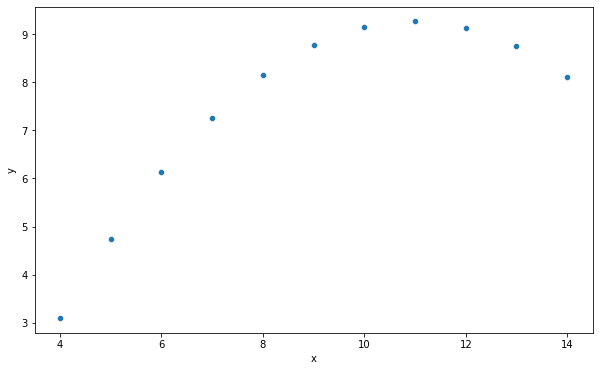

In [104]:
sns.scatterplot(x = df2['x'], y = df2['y'])

#### Save our X and y data

In [105]:
y = df2['y']
X = df2[['x']]

### Fit a Linear Regression model

In [106]:
from sklearn.linear_model import LinearRegression

In [107]:
m = LinearRegression()

In [108]:
m.fit(X,y)

LinearRegression()

In [109]:
round(m.score(X,y),2)

0.67

In [110]:
y_pred = m.predict(X)

In [111]:
df2['y_pred'] = y_pred

<AxesSubplot:xlabel='x', ylabel='y'>

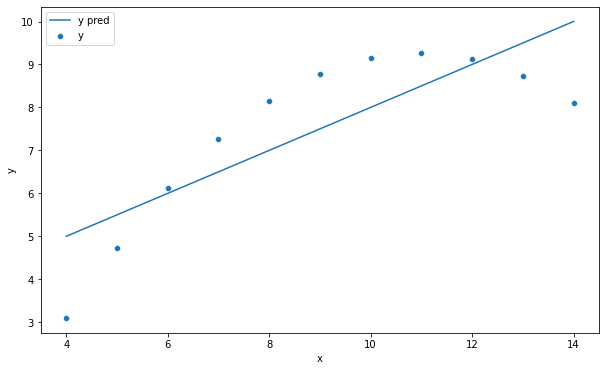

In [112]:
sns.scatterplot(data = df2, x = 'x', y = 'y', label = 'y')
sns.lineplot(data = df2, x = 'x', y = 'y_pred', label = 'y pred')

#### Now let's try to fix it by adding polynomials
- For our `x`, define `x^2`

## Polynomials

- Extra features that are **powers** of an existing feature.
- Sum of powers of x, multiplied by some coefficient

$$
a_0 * x^0 + a_1 * x^1 + a_2 * x^2 + ...
$$

- Might increase accuracy of your model 
- Also increase risk of over fitting

In [113]:
X['x^2'] = X['x']**2

<ipython-input-113-a61f37d19fca>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['x^2'] = X['x']**2


In [114]:
X.head()

,x,x^2
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0


### Let's fit again with both features

In [115]:
m.fit(X,y)

LinearRegression()

In [116]:
y_pred_poly = m.predict(X)

In [117]:
df2['y_pred_poly'] = y_pred_poly

<AxesSubplot:xlabel='x', ylabel='y'>

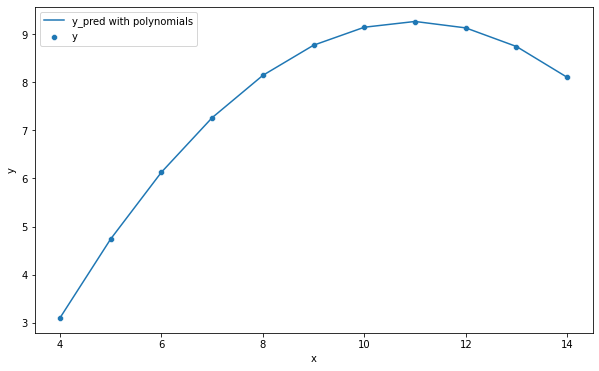

In [118]:
sns.scatterplot(x = df2['x'], y = df2['y'], label = 'y')
sns.lineplot(x = df2['x'], y = df2['y_pred_poly'], label = 'y_pred with polynomials' )

In [119]:
m.score(X,y)

0.999999457857722

---

#### As usual ...this is something Sklearn can do for us

## Polynomial Features with Sklearn 

In [120]:
from sklearn.preprocessing import PolynomialFeatures

##### Create a polynomial feature transformer, specify the degrees

In [150]:
pt = PolynomialFeatures(degree= 3, include_bias= True,interaction_only=False)

In [151]:
pt.fit(X[['x']])

PolynomialFeatures(degree=3)

In [152]:
p_features = pt.transform(X[['x']])

In [153]:
p_features

array([[1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02],
       [1.000e+00, 1.300e+01, 1.690e+02, 2.197e+03],
       [1.000e+00, 9.000e+00, 8.100e+01, 7.290e+02],
       [1.000e+00, 1.100e+01, 1.210e+02, 1.331e+03],
       [1.000e+00, 1.400e+01, 1.960e+02, 2.744e+03],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02],
       [1.000e+00, 4.000e+00, 1.600e+01, 6.400e+01],
       [1.000e+00, 1.200e+01, 1.440e+02, 1.728e+03],
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02],
       [1.000e+00, 5.000e+00, 2.500e+01, 1.250e+02]])

In [154]:
pt.get_feature_names()

/home/arjun/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x0^2', 'x0^3']

##### Fit transform the data in question, and look at it in a DF with column names

In [155]:
pd.DataFrame(p_features, columns=pt.get_feature_names())

,1,x0,x0^2,x0^3
0,1.0,10.0,100.0,1000.0
1,1.0,8.0,64.0,512.0
2,1.0,13.0,169.0,2197.0
3,1.0,9.0,81.0,729.0
4,1.0,11.0,121.0,1331.0
5,1.0,14.0,196.0,2744.0
6,1.0,6.0,36.0,216.0
7,1.0,4.0,16.0,64.0
8,1.0,12.0,144.0,1728.0
9,1.0,7.0,49.0,343.0


---

# Interaction terms
* If our X data has 2 features, x1 and x2, then a 2 degree polynomial result would take the form:
* $1, x1, x2, x1^2, x1*x2, x2^2$
* Each of these get their own coefficient
* We can use the polynomial preprocessing function, but set interaction_only=True

In [156]:
X

,x,x^2
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0
16,14.0,196.0
17,6.0,36.0
18,4.0,16.0
19,12.0,144.0
20,7.0,49.0


In [159]:
X

,x,x^2
11,10.0,100.0
12,8.0,64.0
13,13.0,169.0
14,9.0,81.0
15,11.0,121.0
16,14.0,196.0
17,6.0,36.0
18,4.0,16.0
19,12.0,144.0
20,7.0,49.0


In [ ]:
PolynomialFeatures()

In [1]:
pt = PolynomialFeatures(interaction_only=False, include_bias= False)
p_features = pt.fit_transform(X)
pd.DataFrame(p_features, columns=pt.get_feature_names())

NameError: name 'PolynomialFeatures' is not defined

---